This script generates a heatmap from data indicating the probability of oviparity as the root state of squamates as a function of model parameters.

In [1]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline


First, let's get some data.

In [10]:
data = pd.read_csv("../Data/Heatmap/TO.csv", index_col = False, header = False)
data.columns = ['A','B','C']

In [11]:
data

,A,B,C
0,0.1,0.2,0.044280
1,0.1,0.3,0.017266
2,0.1,0.4,0.002536
3,0.1,0.5,0.000749
4,0.1,0.6,0.000282
5,0.1,0.7,0.000119
6,0.1,0.8,0.000061
7,0.1,0.9,0.000032
8,0.1,1.0,0.000020
9,0.2,0.1,0.922133


If you're like me, generally, you store data one variable per column. This isn't ideal for heatmaps. Matplotlib's heatmap assumes data have one variable down the x-axis of the spreadsheet and one along the top, or y-axis. Pandas can melt our data to be in this format.

In [12]:
h_data = data.pivot(index='A', columns='B', values='C')
h_data.ix[0.1,0.1] = .036
h_data

B,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
A,,,,,,,,,,
0.1,0.036000,0.044280,0.017266,0.002536,0.000749,0.000282,0.000119,0.000061,0.000032,0.000020
0.2,0.922133,0.862397,0.158870,0.020354,0.004965,0.001887,0.000876,0.000440,0.000247,0.000156
0.3,0.999754,0.999456,0.961875,0.407806,0.078138,0.022981,0.009757,0.004679,0.002614,0.001583
0.4,0.999928,0.999822,0.997877,0.951718,0.728194,0.169208,0.065020,0.028220,0.015671,0.008665
0.5,0.999963,0.999905,0.999428,0.992227,0.932562,0.767928,0.277918,0.126080,0.070692,0.035134
0.6,0.999977,0.999938,0.999699,0.998341,0.983742,0.927726,0.791288,0.414008,0.186163,0.112650
0.7,0.999986,0.999957,0.999824,0.999284,0.996463,0.973685,0.914741,0.813443,0.593897,0.554725
0.8,0.999990,0.999968,0.999875,0.999568,0.997662,0.987702,0.963515,0.907783,0.805892,0.640272
0.9,0.999991,0.999974,0.999899,0.999691,0.998416,0.993186,0.970505,0.927551,0.897569,0.806492


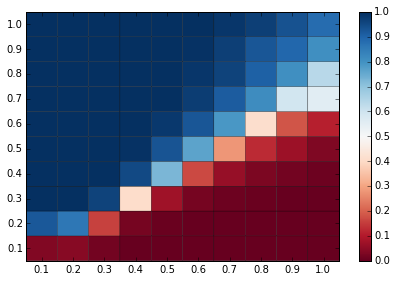

In [13]:
plt.pcolor(h_data,cmap=plt.cm.RdBu,edgecolors='k')
plt.xticks(np.arange(0.5, len(h_data.columns), 1), h_data.columns)
plt.yticks(np.arange(0.5, len(h_data.index), 1), h_data.index)
cbar = plt.colorbar()
plt.tight_layout()
plt.savefig('TO.svg', bbox_inches='tight', dpi=300)


And heatmap. As you can se, our data has a very sharp switch point (i.e. values tend to be very high support or low support), with few in between.

Copyright (c) <2014> <April Wright, wright.aprilm@gmail.com>


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.